In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Função para aplicar a convolução
# Tem como parâemtros:
#   image - Imagem original à ser modificada
#   mask - Máscara do filtro
#   padding - Preenchimmento da imagem para aplicação da máscara
#   strides - Avanço entre os pixels (padrão 1)

def convolve2D(image, mask, padding=0):
    
    # Inversão da matriz, necessário para realizr a convolução
    # Caso não fosse feito, o processo seria d correlação
    mask = np.flipud(np.fliplr(mask))

    # É necessário computar o tamanho da matriz referente à imagem de saída
    # Para isso, aplicamos a fórmula:
    #
    # nout = floor( (nin + 2p - k)/s + 1 )
    #
    # onde:
    #
    # nin = numero dos recursos de entrada
    # nout = numero dos recursos de saída
    # k = tamanho da máscara da convolução
    # p = tamanho do preenchimento (padding) da convolução
    # s = valor do avanço da convolução 
    #
    # obs: Como o valor do avanço na convolução no caso deste
    # exercício é sempre 1, a aplicação deste função será 
    # adaptada para ignorar este valor
    #
    # É importante ressaltar que esta operação deve ser implementada 
    # em cada dimensão (x,y)

    # Definição dos tamanhos da imagem e da máscara
    maskLinhas = mask.shape[0]
    maskColunas = mask.shape[1]
    linhas = image.shape[0]
    colunas = image.shape[1]  

    # Definição dos novos valores das dimensões (x,y) 
    xOutput = int(((linhas - maskLinhas + 2 * padding)) + 1)
    yOutput = int(((colunas - maskColunas + 2 * padding)) + 1)
    # Nova matriz, contendo as novas dimensões calculadas:
    output = np.zeros((xOutput, yOutput))

    # Este método depende especificamente de o preenchimento ser uniforme em cada lado. 
    # Caso haja a implementação de padding, é criada uma nova matriz de zeros com as dimensões preenchida
    # Obs: O padding é multiplicado por 2 para que o padding seja aplicado igualmente em todos os lados
    #      Em caso impar,  matriz não iria manter sua proporção  
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        
        # Aplicando a imagem original dentro da nova matriz (com as novs proporções)
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        #print(imagePadded)
    
    # Caso o padding não precise ser aplicado, as dimensões da imagem se mantém
    else:
        imagePadded = image

    # A imagem é percorrida e as operações da convolução são aplicadas    
    for y in range(image.shape[1]):
        # O 'for' para as dimensões x e y continuam operando até que a iteração 
        # atual atinja o último píxel da imagem original. A condicional evita que
        # o processo da convolução se arraste pra o padding
        if y > image.shape[1] - maskColunas:
            break

        for x in range(image.shape[0]):
            if x > image.shape[0] - maskLinhas:
                break

            try:
                # Aplica a operação da convolução: os elementos multiplicados com a máscara 
                # são somados e armazenados na nova matriz da imagem 
                output[x, y] = (mask * imagePadded[x: x + maskLinhas, y: y + maskColunas]).sum()
            except:
                break
    #Retorno da matriz
    return output

In [3]:
# Função para criação do kernel de média
def blurKernel(size):
    # Matriz 'lst' é uma intermediária que cria cada row da matriz principal 'm'
    lst = []
    m = []
    # Criação das linhas da matriz de zeros
    for i in range(0,size):
        for j in range(0,size):
            lst.append(1)   
        # Coloca a linha na matriz principal    
        m.append(lst)    
        # Zera a matriz intermediária
        lst = []
    
    #Cáculo da média
    for i in range(0,size):
        for j in range(0,size):
            m[i][j] = m[i][j]/(size*size)

    return m

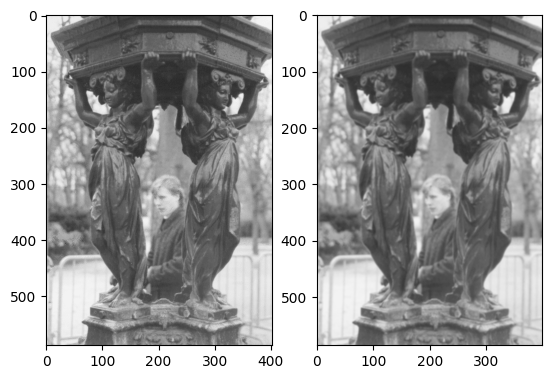

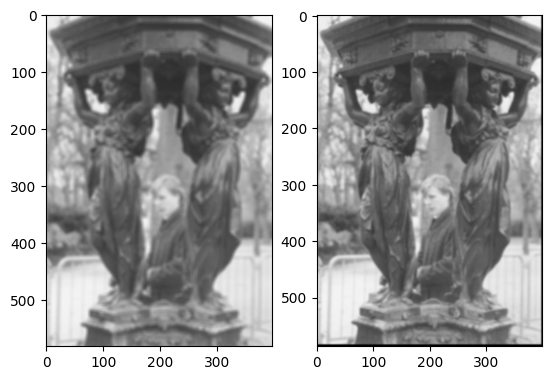

In [4]:

plt.subplot(1,2,1)
img = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
linhas = img.shape[0]
colunas = img.shape[1]
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
# Máscara para o filtro de média
# Máscara 3x3                                                                      
maskM3 = blurKernel(3)
filtered_img = convolve2D(img, maskM3, padding=0)
plt.imshow(filtered_img, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.subplot(1,2,1)
# Máscara 7x7 
maskM7 = blurKernel(7)
filtered_img2 = convolve2D(img, maskM7, padding=0)
plt.imshow(filtered_img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
# Máscara 3x3, aplicada 3 vezes respectivas                                                                      
maskM3 = blurKernel(3)
filtered_imgA = convolve2D(img, maskM3, padding=0)
filtered_imgB = convolve2D(filtered_imgA, maskM3, padding=0)
filtered_imgC = convolve2D(filtered_imgB, maskM3, padding=0)
plt.imshow(filtered_imgC, cmap='gray', vmin=0, vmax=255)
plt.show()


In [5]:
# Função para criação dos kernels
def Gaussian(l,sig):

    # A função numpy.linspace() Cria matrizes com espaçamento uniforme ou não uniforme
    # Como parâmetros da função:
    #
    # -> Parametro 1  : Início do intervalo. Por padrão, início = 0
    # -> Parametro 2  : Fim do intervalo
    # -> Parametro 3  : Indica o número de pontos que o intervalo deve conter, ou seja, o comprimento do arranjo resultante.

    # Neste caso, 'ax' recebe um vetor de tamanho 'L', que vai de '-L' até 'L'
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    # O calculo de gaussiana é aplicado aos elementos de 'ax'
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    # A máscara é gerada
    # np.outer() é uma função responsável por calcular o produto externo de dois vetores.
    # basicamente é feita a multiplicação de dois vetores
    # gera uma matriz bidimensional
    kernel = np.outer(gauss, gauss)

    # O retorno é dado por uma matriz cuja cada elemento foi dividido pela somatória de todos 
    # os elementos da propria matriz
    return kernel / np.sum(kernel)

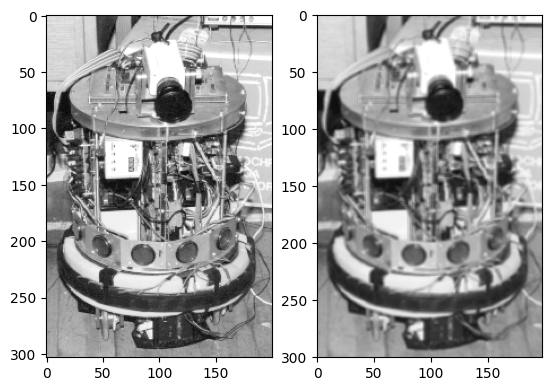

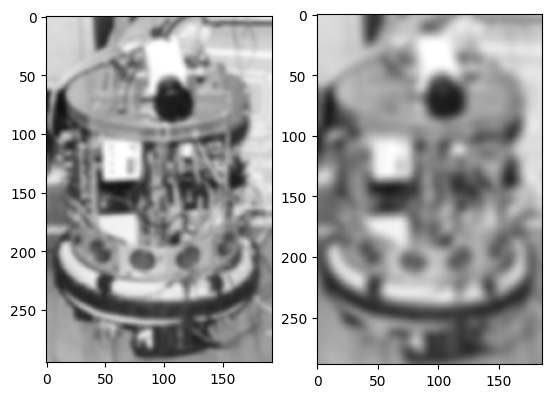

In [6]:
plt.subplot(1,2,1)
img = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)
linhas = img.shape[0]
colunas = img.shape[1]
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
# Máscara para o filtro gaussiano
# Máscara 5x5                                                                      
maskG1 = Gaussian(5,1.0)
filtered_img = convolve2D(img, maskM3, padding=0)
plt.imshow(filtered_img, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.subplot(1,2,1)
# Máscara para o filtro gaussiano
# Máscara 9x9                                                                      
maskG2 = Gaussian(9,2.0)
filtered_img2 = convolve2D(img, maskG2, padding=0)
plt.imshow(filtered_img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
# Máscara para o filtro gaussiano
# Máscara 15x15                                                                      
maskG3 = Gaussian(15,4.0)
filtered_img3 = convolve2D(img, maskG3, padding=0)
plt.imshow(filtered_img3, cmap='gray', vmin=0, vmax=255)


In [ ]:
# ----------------------------------------------
# REFAZER FILTRO MEDIANA
# ----------------------------------------------

import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(1,2,1)
img = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)
linhas = img.shape[0]
colunas = img.shape[1]
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
